## Regression Project

### Problem Statement
Agricultural activities have a negative impact on the enironment by contributing to CO2 emissions which in turn impacts climate change.

The aim is to analyse and predict average temperature from the agri-food sector, using data from the FAO and IPCC, to understand climate impacts and develop sustainable strategies for stakeholders including policymakers and agricultural businesses.

In [1]:
##these are the packages needed for data cleaning and eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Import the dataset

In [2]:
df = pd.read_csv("co2_emissions_from_agri.csv")


### Data Overview
After importing the data, I'm going to get a high level overview to understand its structure.

In [3]:
#inspect the top 5 rows
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
#replace whitespace in column names with _
df.columns = [col.replace(" ", "_") for col in df.columns]

In [5]:
#inspect the bottom 5 rows
df.tail()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [6]:
#Check the shape of the data, i.e., how many columns and rows the dataframe consists of
df.shape

(6965, 31)

The dataframe consists:
1. Columns = 6965
2. Rows = 31

In [7]:
#Get a summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

- Population values should be integers, temperature should be float

- Each column should have a total of 6965 non-null values. 

- Notice that some columns have null values that will need to be looked at. 

#### Change Area column name to Country

In [8]:
df = df.rename(columns = {'Area': 'Country'})

In [9]:
df.tail()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


#### Check sum of NaN values is each column

In [9]:
# checking for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
IPPU                                743
Manure_applied_to_Soils             928
Manure_Management                   928
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956
dtype: int64


There are quite a few columns with missing data. We'll focus on Savanna fires and Forest fires first. These have smaller amounts of missing values.

#### Investigate missing values for Savanna fires and Forest fires

In [11]:
pd.set_option('display.max_columns', 50)

Heatmap showing columns with missing values

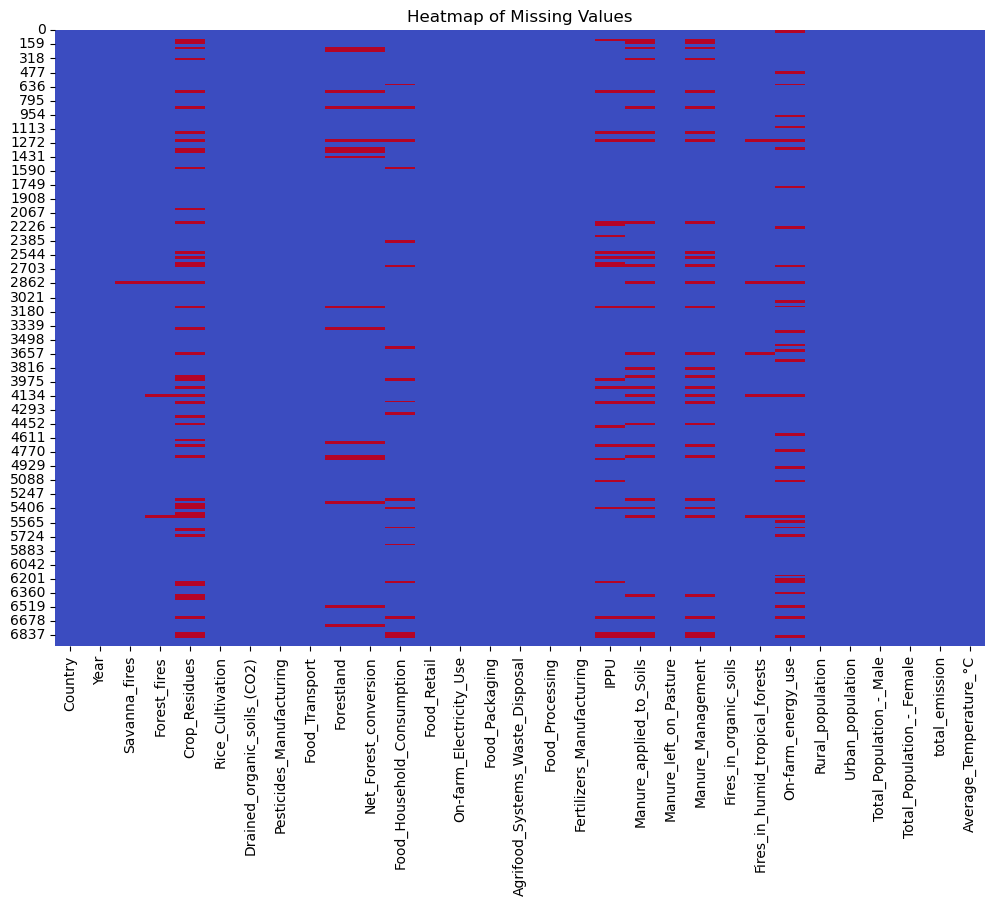

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'coolwarm')
plt.title('Heatmap of Missing Values')
plt.show()

#### Savanna fires

In [101]:
#savana fires
df[df['Savanna_fires'].isnull()].head()


,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
2835,Holy See,1990,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0466,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6382,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,768.0,340.0,370.0,18688.406793,0.905583
2836,Holy See,1991,NaN,NaN,NaN,9654.499823,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0457,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6414,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,774.0,330.0,360.0,18726.641610,-0.098083
2837,Holy See,1992,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0433,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6399,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,779.0,330.0,360.0,18684.924938,0.773167
2838,Holy See,1993,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0107,0.0230,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6012,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,330.0,360.0,18684.874838,0.564417
2839,Holy See,1994,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0184,0.0254,112.135517,67.631366,65.072347,451.196291,2357.644701,0.5894,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,320.0,350.0,18717.728958,1.444500


#### Notes:
Holly See

These missing values seem to be missing completely at random (MAR). Why? There's only one country that's missing data for this column. It seems that this may be related to the fact that there's no desert area in this country does not have a savana. We will remove these rows as it seems like quite a few features for this country has missing values. 

Removing the rows in the next block. 

In [10]:
#create copy of df
df_copy = df.copy()

#remove records for Holy See
df_copy = df_copy.drop(df_copy[df_copy['Country'] == 'Holy See'].index)


#### Forest fires

In [123]:
pd.set_option('display.max_rows', 200)

In [11]:
df_copy[df_copy['Forest_fires'].isnull()].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
4117,Monaco,1990,0.0,NaN,NaN,8976.562525,0.0,11.481085,0.0657,0.0,...,NaN,0.058149,NaN,NaN,0.0,29439.0,14435.0,15894.0,13617.314148,1.026750
4118,Monaco,1991,0.0,NaN,NaN,9014.795042,0.0,11.481085,0.0051,0.0,...,NaN,0.058149,NaN,NaN,0.0,29624.0,14577.0,15987.0,13204.334274,0.223833
4119,Monaco,1992,0.0,NaN,NaN,8976.562525,0.0,11.481085,0.0308,0.0,...,NaN,0.058149,NaN,NaN,0.0,29863.0,14722.0,16073.0,13618.319948,0.757167
4120,Monaco,1993,0.0,NaN,NaN,8976.562525,0.0,11.481085,0.0056,0.0,...,NaN,0.058149,NaN,NaN,0.0,30138.0,14864.0,16160.0,13619.547048,0.493333
4121,Monaco,1994,0.0,NaN,NaN,9009.418345,0.0,11.481085,0.0046,0.0,...,NaN,0.058149,NaN,NaN,0.0,30427.0,15002.0,16252.0,13651.372368,1.346000


Based on the above results, we can see that these countries do not have any forestland. We notice that San Morino has negative forest land coverage values. We know that this cannot be true, so we will also go ahead and correct that.

In [12]:
#fill missing values in Monaco and San Morino with 0 for the forest_fires feature
df_copy[df_copy['Country'] == 'Monaco'] = df_copy[df_copy['Country'] == 'Monaco'].fillna(0)

df_copy[df_copy['Country'] == 'San Marino'] = df_copy[df_copy['Country'] == 'San Marino'].fillna(0)


We have filled the missing values for both columns - Savana fires and Forest fires. We'll now tackle columns with higher missing values.

In [13]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues                      1296
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
IPPU                                743
Manure_applied_to_Soils             835
Manure_Management                   835
Fires_in_humid_tropical_forests      62
On-farm_energy_use                  863
dtype: int64


Drop rows where 6 or more columns/features are missing. 

In [15]:
df_copy = df_copy.dropna(thresh = len(df.columns)-6)

The above drops any row that has more than 6 missing values. We can see that our missing values in fires in humid tropical forests column came down to 31.

In [16]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues                      1252
Forestland                          449
Net_Forest_conversion               449
Food_Household_Consumption          441
IPPU                                700
Manure_applied_to_Soils             791
Manure_Management                   791
Fires_in_humid_tropical_forests      31
On-farm_energy_use                  819
dtype: int64


In [17]:
df_copy[df_copy['Fires_in_humid_tropical_forests'].isna()].head()


,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
3635,Liechtenstein,1990,0.0,0.0,NaN,9239.011226,0.0,11.481085,0.0001,10.7375,...,NaN,0.058149,NaN,2.1121,23881.0,4866.0,14295.0,14470.0,13869.982823,1.059000
3636,Liechtenstein,1991,0.0,0.0,NaN,9698.602222,0.0,11.481085,0.0003,10.7375,...,NaN,0.058149,NaN,1.3677,24212.0,4896.0,14492.0,14675.0,13894.950326,0.216250
3637,Liechtenstein,1992,0.0,0.0,NaN,9239.011226,0.0,11.481085,0.0008,10.7375,...,NaN,0.058149,NaN,1.5399,24560.0,4937.0,14691.0,14890.0,13416.590373,1.231917
3638,Liechtenstein,1993,0.0,0.0,NaN,9239.011226,0.0,11.481085,0.0045,10.7375,...,NaN,0.058149,NaN,1.6938,24937.0,4982.0,14899.0,15113.0,13849.197166,0.735000
3639,Liechtenstein,1994,0.0,0.0,NaN,9271.867046,0.0,11.481085,0.0046,10.7375,...,NaN,0.058149,NaN,1.6815,25335.0,5030.0,15108.0,15338.0,13866.710700,1.962500


Liechtenstein is situated in Europe and does not have tropical forests. We can say that the data is not missing at random. We will inpute these missing values with 0

In [20]:
#impute 0 for missing valus
df_copy[df_copy['Country'] == 'Liechtenstein'] = df_copy[df_copy['Country'] == 'Liechtenstein'].fillna(0)

In [21]:
df_copy[df_copy['Country'] == 'Liechtenstein'].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
3635,Liechtenstein,1990,0.0,0.0,0.0,9239.011226,0.0,11.481085,0.0001,10.7375,...,0.0,0.058149,0.0,2.1121,23881.0,4866.0,14295.0,14470.0,13869.982823,1.059000
3636,Liechtenstein,1991,0.0,0.0,0.0,9698.602222,0.0,11.481085,0.0003,10.7375,...,0.0,0.058149,0.0,1.3677,24212.0,4896.0,14492.0,14675.0,13894.950326,0.216250
3637,Liechtenstein,1992,0.0,0.0,0.0,9239.011226,0.0,11.481085,0.0008,10.7375,...,0.0,0.058149,0.0,1.5399,24560.0,4937.0,14691.0,14890.0,13416.590373,1.231917
3638,Liechtenstein,1993,0.0,0.0,0.0,9239.011226,0.0,11.481085,0.0045,10.7375,...,0.0,0.058149,0.0,1.6938,24937.0,4982.0,14899.0,15113.0,13849.197166,0.735000
3639,Liechtenstein,1994,0.0,0.0,0.0,9271.867046,0.0,11.481085,0.0046,10.7375,...,0.0,0.058149,0.0,1.6815,25335.0,5030.0,15108.0,15338.0,13866.710700,1.962500


In [22]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues                 1221
Forestland                     449
Net_Forest_conversion          449
Food_Household_Consumption     441
IPPU                           700
Manure_applied_to_Soils        760
Manure_Management              760
On-farm_energy_use             819
dtype: int64


Next I'll tackle
#### Foresland

In [151]:
df_copy[df_copy['Forestland'].notna()].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [23]:
forestland_feature_nan = df_copy[df_copy['Forestland'].isna()]['Country'].unique().tolist()

In [24]:
df_copy.describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6890.000000,6890.000000,6890.000000,5669.000000,6890.000000,6890.000000,6890.000000,6890.000000,6441.000000,6.441000e+03,...,6130.000000,6890.000000,6890.000000,6071.000000,6.890000e+03,6.890000e+03,6.890000e+03,6.890000e+03,6.890000e+03,6890.000000
mean,2005.144848,1195.980036,916.900503,982.322523,4216.252178,3541.326292,335.809189,1950.008181,-17914.091742,1.769038e+04,...,2229.007086,1223.489706,660.691503,2978.253064,1.805158e+07,1.711633e+07,1.773435e+07,1.743706e+07,6.454168e+04,0.872083
std,8.890713,5262.152637,3715.511941,3672.054796,17701.041284,15943.325884,1436.677158,5645.087992,82019.559024,1.013933e+05,...,7924.595072,22792.562505,3246.657001,12576.795680,8.947895e+07,6.607673e+07,7.643968e+07,7.289756e+07,2.295097e+05,0.556335
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.880000e+02,6.550000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,9.322500,175.716350,0.000000,6.000000,28.934100,-2986.479500,0.000000e+00,...,35.615825,0.000000,0.000000,12.517500,1.034528e+05,2.438575e+05,2.074278e+05,2.123008e+05,5.154321e+03,0.511021
50%,2005.000000,1.722150,0.480300,98.188500,506.346510,0.000000,13.000000,205.758650,-63.115100,4.659310e+01,...,257.448100,0.000000,0.000000,129.217200,1.715960e+06,2.386642e+06,2.478868e+06,2.457668e+06,1.202520e+04,0.832333
75%,2013.000000,114.955800,64.110500,361.431100,1463.391166,705.304925,114.750000,1192.618650,0.000000,4.746042e+03,...,1090.755375,0.000000,8.350550,1110.903200,8.340720e+06,8.428865e+06,8.914153e+06,8.982790e+06,3.584673e+04,1.205542
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [182]:
df_copy[df_copy['Forestland'] < 0].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
186,Anguilla,1990,0.0,0.0,NaN,3183.472299,0.0,11.481085,2.2211,-62.92,NaN,4.4221,1.6083,0.5657,74.018133,65.072347,483.1261,2791.684228,0.0,NaN,6328.357703,NaN,0.0,0.0,1.3833,0.0,8334.0,4120.0,4196.0,12947.412394,0.392583
187,Anguilla,1991,0.0,0.0,NaN,3011.420430,0.0,11.481085,2.2562,-62.92,NaN,4.6743,1.5084,0.4551,74.018133,65.072347,483.1261,2791.684228,0.0,NaN,6328.357703,NaN,0.0,0.0,1.4630,0.0,8666.0,4279.0,4338.0,12775.517025,0.395417
188,Anguilla,1992,0.0,0.0,NaN,3183.472299,0.0,11.481085,2.3594,-62.92,NaN,5.1221,1.8522,0.5404,74.018133,65.072347,483.1261,2791.684228,0.0,NaN,6328.357703,NaN,0.0,0.0,1.3625,0.0,8981.0,4412.0,4474.0,12948.448494,0.421500
189,Anguilla,1993,0.0,0.0,NaN,5305.567622,0.0,11.481085,2.4624,-62.92,NaN,6.3927,1.9628,0.7432,74.018133,65.072347,483.1261,2791.684228,0.0,NaN,6328.357703,NaN,0.0,0.0,1.2062,0.0,9266.0,4523.0,4598.0,15072.074517,0.570167
190,Anguilla,1994,0.0,0.0,NaN,5305.567622,0.0,11.481085,2.5654,-62.92,NaN,6.4208,1.7496,1.0291,74.018133,65.072347,483.1261,2791.684228,0.0,NaN,6328.357703,NaN,0.0,0.0,1.1567,0.0,9537.0,4636.0,4720.0,15072.228817,0.572500


I'm going to change the negative forestland values to postives. This might have been a system error as countries cannot have negative forest coverage, and the value would be 0 or missing is there's no forest land coverage.

In [51]:
df_copy['Forestland'] = df['Forestland'].abs()

C:\Users\X464585\AppData\Local\Temp\ipykernel_10572\1930972014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Forestland'] = df['Forestland'].abs()


In [52]:
df_copy.describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Food_Household_Consumption,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.00000,6270.000000,5859.000000,6270.000000,...,6270.000000,6270.000000,6270.000000,6270.000000,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6270.000000
mean,2006.540191,1187.193438,910.020620,822.854395,4196.560705,3531.493280,342.53067,1988.620633,19119.628637,4756.442825,...,1972.100415,1218.098551,655.982660,2579.288498,1.796514e+07,1.753925e+07,1.791469e+07,1.760982e+07,6.560800e+04,0.919996
std,8.071891,5281.832015,3731.785673,3382.929540,17579.907906,15910.794886,1461.89308,5727.522494,82024.222961,26009.968628,...,7489.861190,23258.138915,3256.532767,11160.069763,8.873856e+07,6.799408e+07,7.720637e+07,7.358966e+07,2.360510e+05,0.540741
min,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.004500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.880000e+02,6.550000e+02,-3.918841e+05,-1.415833
25%,2000.000000,0.000000,0.000000,1.170775,180.819000,0.000000,6.00000,30.715825,0.000000,16.186075,...,13.788700,0.000000,0.000000,16.148800,1.075052e+05,2.630065e+05,2.165598e+05,2.162338e+05,5.147145e+03,0.565167
50%,2007.000000,1.657900,0.390700,87.084750,502.618196,0.000000,13.00000,221.476200,145.677400,155.471100,...,182.468950,0.000000,0.000000,140.688800,1.740047e+06,2.453250e+06,2.522517e+06,2.489395e+06,1.207489e+04,0.876375
75%,2014.000000,108.670625,58.627900,270.858200,1463.391166,704.940225,116.00000,1219.779025,3409.380800,1296.139125,...,897.065425,0.000000,6.884600,883.992325,8.437579e+06,8.536314e+06,9.138134e+06,9.206787e+06,3.616107e+04,1.237750
max,2020.000000,114616.401100,52227.630600,33490.074100,158064.797800,241025.069600,16459.00000,67945.765000,797183.079000,466288.200700,...,70592.646500,991717.543100,51771.256800,139388.923600,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


Fill the missing Forestland columns with the median, as data is skewed to the right. See histogram below. This tells us that most of our data lies toward the lower end of the scale. 

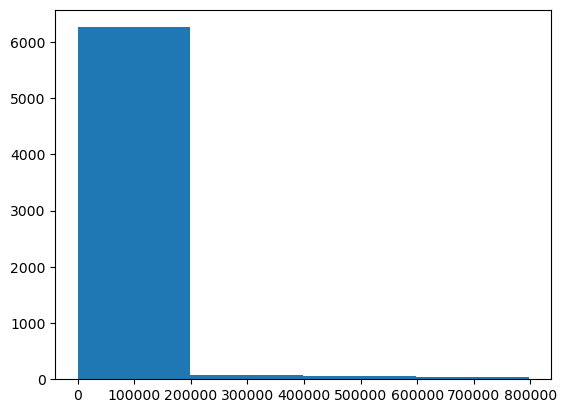

In [26]:
plt.hist(x=df_copy['Forestland'], bins = 4)
plt.show()

In [64]:
median_forestland = df['Forestland'].median()

df_copy.loc[df_copy['Country'].isin(forestland_feature_nan), 'Forestland'] = median_forestland

In [65]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


#### handling missing values in the Net_Forest_conversion feature

In [201]:
df_copy[df_copy['Net_Forest_conversion'].isna()]

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
186,Anguilla,1990,0.0000,0.0000,NaN,3183.472299,0.0,11.481085,2.2211,-62.92,NaN,4.4221,1.6083,0.5657,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6328.357703,NaN,0.0,0.0000,1.3833,0.0,8334.0,4120.0,4196.0,12947.412394,0.392583
187,Anguilla,1991,0.0000,0.0000,NaN,3011.420430,0.0,11.481085,2.2562,-62.92,NaN,4.6743,1.5084,0.4551,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6328.357703,NaN,0.0,0.0000,1.4630,0.0,8666.0,4279.0,4338.0,12775.517025,0.395417
188,Anguilla,1992,0.0000,0.0000,NaN,3183.472299,0.0,11.481085,2.3594,-62.92,NaN,5.1221,1.8522,0.5404,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6328.357703,NaN,0.0,0.0000,1.3625,0.0,8981.0,4412.0,4474.0,12948.448494,0.421500
189,Anguilla,1993,0.0000,0.0000,NaN,5305.567622,0.0,11.481085,2.4624,-62.92,NaN,6.3927,1.9628,0.7432,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6328.357703,NaN,0.0,0.0000,1.2062,0.0,9266.0,4523.0,4598.0,15072.074517,0.570167
190,Anguilla,1994,0.0000,0.0000,NaN,5305.567622,0.0,11.481085,2.5654,-62.92,NaN,6.4208,1.7496,1.0291,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6328.357703,NaN,0.0,0.0000,1.1567,0.0,9537.0,4636.0,4720.0,15072.228817,0.572500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741,Vanuatu,2016,0.0000,0.0000,0.0655,246.407276,0.0,4.000000,11.3598,-62.92,NaN,3.4101,30.4229,1.3823,80.607732,12.116000,252.21419,2240.392965,4.6875,7.0815,67.277000,60.4940,0.0,0.0000,9.3664,202634.0,67768.0,142613.0,140606.0,3031.285163,1.156000
6742,Vanuatu,2017,0.2003,8.6132,0.0666,246.407276,0.0,4.000000,9.9916,-62.92,NaN,3.5608,34.3980,1.4742,80.607732,12.426700,252.21419,3052.546276,4.8193,7.0411,70.609400,60.8040,0.0,8.6132,8.1971,206733.0,69511.0,146105.0,144135.0,3866.590974,1.081083
6743,Vanuatu,2018,0.0000,0.0000,0.0670,246.407276,0.0,3.000000,14.0470,-62.92,NaN,3.5329,39.5637,1.2697,80.607732,12.734300,252.21419,2240.392965,4.8911,7.3476,68.890700,61.9989,0.0,0.0000,11.0087,210816.0,71301.0,149615.0,147683.0,3047.973763,0.626583
6744,Vanuatu,2019,0.0000,0.0000,0.0675,246.407276,0.0,3.000000,12.3254,-62.92,NaN,3.5657,44.4501,1.3915,80.607732,12.940900,252.21419,2240.392965,4.8876,6.9856,61.344800,59.6191,0.0,0.0000,9.7323,214878.0,73139.0,153149.0,151256.0,3039.932663,0.941167


In [203]:
numeric_df[['Net_Forest_conversion', 'total_emission', 'Average_Temperature_°C']].corr()

,Net_Forest_conversion,total_emission,Average_Temperature_°C
Net_Forest_conversion,1.000000,0.430340,-0.031408
total_emission,0.430340,1.000000,0.019315
Average_Temperature_°C,-0.031408,0.019315,1.000000


We see weak corrlations between net forest conversion and avg temp as well as total emissions. Let's see if there's stornger correlations with the other features in the dataset

In [216]:
numeric_df.corr()['Net_Forest_conversion'].sort_values(ascending = False)

Net_Forest_conversion              1.000000
Manure_left_on_Pasture             0.496848
Fires_in_humid_tropical_forests    0.458916
total_emission                     0.430340
Forest_fires                       0.420561
Agrifood_Systems_Waste_Disposal    0.230741
Savanna_fires                      0.226274
Drained_organic_soils_(CO2)        0.216018
Fires_in_organic_soils             0.195820
Food_Transport                     0.184530
Manure_applied_to_Soils            0.159849
Pesticides_Manufacturing           0.151840
Urban_population                   0.139471
Crop_Residues                      0.120366
On-farm_energy_use                 0.086247
Total_Population_-_Female          0.085101
Total_Population_-_Male            0.078938
Manure_Management                  0.077778
Rice_Cultivation                   0.064102
Food_Retail                        0.033913
Rural_population                   0.032897
Food_Household_Consumption         0.027152
IPPU                            

We will drop the column for now as there are no strong correlations between the Net_Forest_conversion feature and the rest of the features in our dataset. For now, the feautre seems irrelevnt.

In [29]:
#drop feature from df_copy
df_copy = df_copy.drop(['Net_Forest_conversion'], axis = 1)
df_copy

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [30]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues                 1221
Food_Household_Consumption     441
IPPU                           700
Manure_applied_to_Soils        760
Manure_Management              760
On-farm_energy_use             819
dtype: int64


#### Handling missing values in the Food_Household_Consumption feature

In [274]:
df_copy[df_copy['Food_Household_Consumption'].notna()].tail()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.982,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.425,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.265,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.942,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.420,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [225]:
df_copy['Food_Household_Consumption'].describe()


count      6449.000000
mean       4879.900014
std       25871.943134
min           0.000000
25%          11.983300
50%         163.920900
75%        1392.548000
max      466288.200700
Name: Food_Household_Consumption, dtype: float64

In [227]:
numeric_df.corr()['Food_Household_Consumption'].sort_values(ascending = False)

Food_Household_Consumption         1.000000
IPPU                               0.985260
Food_Packaging                     0.965525
Urban_population                   0.925139
Food_Processing                    0.918293
Fertilizers_Manufacturing          0.913451
Food_Retail                        0.882987
total_emission                     0.861626
On-farm_energy_use                 0.854387
Crop_Residues                      0.852701
Manure_applied_to_Soils            0.851218
Manure_Management                  0.831968
Agrifood_Systems_Waste_Disposal    0.807086
Total_Population_-_Female          0.801768
Total_Population_-_Male            0.795976
Pesticides_Manufacturing           0.777136
On-farm_Electricity_Use            0.711864
Rice_Cultivation                   0.699649
Food_Transport                     0.685030
Rural_population                   0.656481
Manure_left_on_Pasture             0.579397
Drained_organic_soils_(CO2)        0.146843
Average_Temperature_°C          

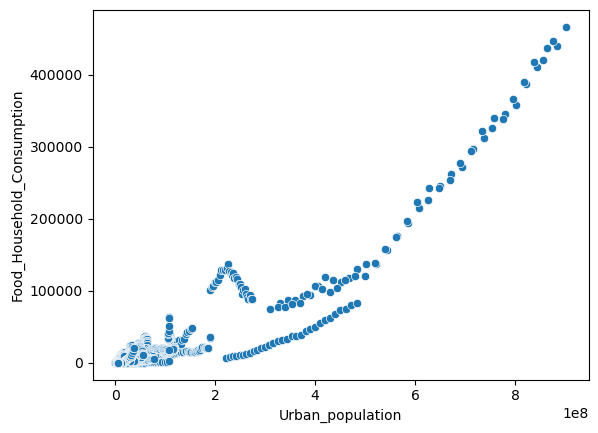

In [230]:
sns.scatterplot(data=df_copy, x='Urban_population', y='Food_Household_Consumption')
plt.show()

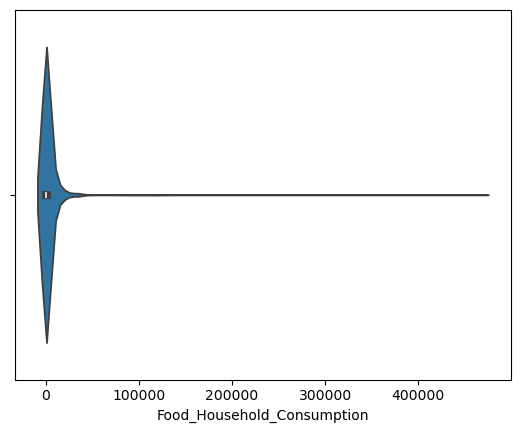

In [236]:
sns.violinplot(data=df_copy,x='Food_Household_Consumption')
plt.show()

In [33]:
household_consumption_nan = df_copy[df_copy['Food_Household_Consumption'].isna()]['Country'].unique().tolist()

In [34]:
#create filtered list
household_consumption_nan_df = df_copy[df_copy['Country'].isin(household_consumption_nan)]

#output expected columns
household_consumption_nan_df[['Year', 'Country', 'Food_Household_Consumption', 'Urban_population']].head()

,Year,Country,Food_Household_Consumption,Urban_population
607,1993,Belgium-Luxembourg,NaN,10101708.0
608,1994,Belgium-Luxembourg,NaN,10152743.0
609,1995,Belgium-Luxembourg,NaN,10196299.0
610,1996,Belgium-Luxembourg,NaN,10229760.0
611,1997,Belgium-Luxembourg,NaN,10256993.0


Based on some observation, it seems as if some countries do not have data for the eary 90s, therefore I'm going to drop years 1990 - 1992. This still retains a significant amount of data, without intriducing bias by imputing values.

In [32]:
#years to drop
year_drop = df_copy['Year'].unique().tolist()
year_drop = year_drop[:3]

#drop rows
df_copy = df_copy[~df_copy['Year'].isin(year_drop)]

df_copy.head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0,0.0,11.712073,54.3617,2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6,0.0,11.712073,53.9874,2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.4,0.0,11.712073,54.6445,2388.803,...,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.0,0.0,11.712073,53.1637,2388.803,...,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.6,0.0,11.712073,52.0390,2388.803,...,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167


Now fill the missing values in the Food_Household_Consumption with the median

In [35]:
median_household_consumption = df['Food_Household_Consumption'].median()

#fill NaN with median
df_copy.loc[df_copy['Country'].isin(household_consumption_nan), 'Food_Household_Consumption'] = median_household_consumption

In [260]:
household_consumption_nan

['Belgium-Luxembourg',
 'British Virgin Islands',
 'Cook Islands',
 'Ethiopia PDR',
 'Falkland Islands (Malvinas)',
 'Gambia',
 'Guam',
 'Liberia',
 'Marshall Islands',
 'Martinique',
 'Micronesia (Federated States of)',
 'Montserrat',
 'Namibia',
 'Northern Mariana Islands',
 'Pacific Islands Trust Territory',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Pierre and Miquelon',
 'Serbia and Montenegro',
 'Somalia',
 'Timor-Leste',
 'Tokelau',
 'United States Virgin Islands',
 'Wallis and Futuna Islands',
 'Western Sahara']

In [36]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues              1110
IPPU                        635
Manure_applied_to_Soils     686
Manure_Management           686
On-farm_energy_use          731
dtype: int64


In [280]:
df_copy[df_copy['IPPU'].notna()].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0,0.0,11.712073,54.3617,2388.803,85.0678,81.4607,9.0635,67.631366,791.9246,252.214190,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6,0.0,11.712073,53.9874,2388.803,88.8058,90.4008,8.3962,67.631366,831.9181,252.214190,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.4,0.0,11.712073,54.6445,2388.803,90.1626,98.8680,7.7721,67.631366,863.0400,252.214190,15.9118,174.3647,275.2359,1779.3139,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.0,0.0,11.712073,53.1637,2388.803,93.7905,21.6458,7.2221,67.631366,887.8772,252.214190,16.9535,165.4230,310.1306,1900.5873,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.6,0.0,11.712073,52.0390,2388.803,93.9696,28.2132,7.4401,67.631366,905.8111,269.476476,18.1079,164.4681,338.9329,2110.6375,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167


In [37]:
#find median for IPPU
IPPU_median = df_copy['IPPU'].median()
#use median to fill missing values in IPPU column
df_copy['IPPU'] = df_copy['IPPU'].fillna(IPPU_median)

C:\Users\X464585\AppData\Local\Temp\ipykernel_10572\1359839160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['IPPU'] = df_copy['IPPU'].fillna(IPPU_median)


The column should now have the median assiged to it where we previously had missing values.

Next we will tack Manure applied to soils and manure management. 

In [38]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues              1110
Manure_applied_to_Soils     686
Manure_Management           686
On-farm_energy_use          731
dtype: int64


#### Manure_applied_to_Soils

In [287]:
df_copy[df_copy['Manure_applied_to_Soils'].isna()].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
96,American Samoa,1993,0.0,0.0,NaN,926.342278,0.0,11.481085,16.9225,58.8991,0.5104,8.4394,17.004663,77.393651,1.8251,94.3041,2005.792129,878.0671,NaN,2148.251693,NaN,0.0,0.0,41.4996,8291.0,42429.0,26198.0,24976.0,5298.828699,-0.032667
97,American Samoa,1994,0.0,0.0,NaN,926.342278,0.0,11.481085,16.2396,58.8991,0.5104,7.9598,17.004663,77.393651,1.8635,88.2302,2005.792129,878.0671,NaN,2148.251693,NaN,0.0,0.0,38.6828,8037.0,43766.0,26750.0,25539.0,5288.813899,0.167917
98,American Samoa,1995,0.0,0.0,NaN,926.342278,0.0,11.481085,15.5796,58.8991,0.5104,7.4803,17.004663,77.393651,1.9014,82.4762,2005.792129,878.0671,NaN,2148.251693,NaN,0.0,0.0,36.2348,7782.0,45086.0,27298.0,26103.0,5279.510299,0.770000
99,American Samoa,1996,0.0,0.0,NaN,926.342278,0.0,11.481085,15.5340,58.8991,0.5104,7.3365,17.004663,77.393651,1.9389,81.5171,2005.792129,878.0671,NaN,2148.251693,NaN,0.0,0.0,35.8632,7527.0,46402.0,27837.0,26663.0,5278.027699,0.809417
100,American Samoa,1997,0.0,0.0,NaN,926.342278,0.0,11.481085,15.7413,58.8991,0.5104,7.5763,17.004663,77.393651,1.9754,84.0746,2005.792129,878.0671,NaN,2148.251693,NaN,0.0,0.0,36.9279,7268.0,47673.0,28368.0,27209.0,5282.133499,0.353000


If a particular farming operation does not apply manure to soils or does not have a specific manure management strategy, the corresponding fields may be missing. In such cases, filling missing values with 0 might make sense.

In [39]:
#fill missing values with 0
df_copy['Manure_applied_to_Soils'] = df_copy['Manure_applied_to_Soils'].fillna(0)
df_copy['Manure_Management'] = df_copy['Manure_Management'].fillna(0)

C:\Users\X464585\AppData\Local\Temp\ipykernel_10572\3722192534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Manure_applied_to_Soils'] = df_copy['Manure_applied_to_Soils'].fillna(0)
C:\Users\X464585\AppData\Local\Temp\ipykernel_10572\3722192534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Manure_Management'] = df_copy['Manure_Management'].fillna(0)


In [40]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues         1110
On-farm_energy_use     731
dtype: int64


Next I'll tack the On Farm energy use feature

In [291]:
numeric_df.corr()['On-farm_energy_use'].sort_values(ascending = False)

On-farm_energy_use                 1.000000
Manure_applied_to_Soils            0.932697
Manure_Management                  0.907408
Food_Processing                    0.907083
Fertilizers_Manufacturing          0.885532
Crop_Residues                      0.874876
Urban_population                   0.874473
Food_Household_Consumption         0.854387
Food_Packaging                     0.854294
IPPU                               0.849362
Agrifood_Systems_Waste_Disposal    0.816868
Pesticides_Manufacturing           0.813653
Total_Population_-_Female          0.808728
total_emission                     0.805926
Total_Population_-_Male            0.799797
Food_Retail                        0.784713
Food_Transport                     0.719319
Rice_Cultivation                   0.713843
Rural_population                   0.706059
On-farm_Electricity_Use            0.667412
Manure_left_on_Pasture             0.639340
Drained_organic_soils_(CO2)        0.184160
Net_Forest_conversion           

In [41]:
#use median to fill missing values
farm_energy_use_med = df_copy['On-farm_energy_use'].median()
#aply median to On farm_energy_use missing values 
df_copy['On-farm_energy_use'] = df_copy['On-farm_energy_use'].fillna(farm_energy_use_med)

C:\Users\X464585\AppData\Local\Temp\ipykernel_10572\106040090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['On-farm_energy_use'] = df_copy['On-farm_energy_use'].fillna(farm_energy_use_med)


In [42]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Crop_Residues    1110
dtype: int64


We have one more feature to look at with regards to the missing values

#### Crop Residues

In [302]:
numeric_df.corr()['Crop_Residues'].sort_values(ascending = False)

Crop_Residues                      1.000000
Manure_Management                  0.968401
Manure_applied_to_Soils            0.946451
Urban_population                   0.940462
Total_Population_-_Female          0.917248
Total_Population_-_Male            0.911391
Agrifood_Systems_Waste_Disposal    0.911255
Pesticides_Manufacturing           0.875651
On-farm_energy_use                 0.874876
Food_Processing                    0.857088
Food_Household_Consumption         0.852701
On-farm_Electricity_Use            0.837607
Rural_population                   0.837161
IPPU                               0.836123
total_emission                     0.834331
Fertilizers_Manufacturing          0.833185
Food_Retail                        0.833016
Rice_Cultivation                   0.824916
Food_Packaging                     0.810343
Manure_left_on_Pasture             0.777154
Food_Transport                     0.769555
Drained_organic_soils_(CO2)        0.209163
Net_Forest_conversion           

In [300]:
df_copy[df_copy['Crop_Residues'].isna()].head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
96,American Samoa,1993,0.0,0.0,NaN,926.342278,0.0,11.481085,16.9225,58.8991,0.5104,8.4394,17.004663,77.393651,1.8251,94.3041,2005.792129,878.0671,0.0,2148.251693,0.0,0.0,0.0,41.4996,8291.0,42429.0,26198.0,24976.0,5298.828699,-0.032667
97,American Samoa,1994,0.0,0.0,NaN,926.342278,0.0,11.481085,16.2396,58.8991,0.5104,7.9598,17.004663,77.393651,1.8635,88.2302,2005.792129,878.0671,0.0,2148.251693,0.0,0.0,0.0,38.6828,8037.0,43766.0,26750.0,25539.0,5288.813899,0.167917
98,American Samoa,1995,0.0,0.0,NaN,926.342278,0.0,11.481085,15.5796,58.8991,0.5104,7.4803,17.004663,77.393651,1.9014,82.4762,2005.792129,878.0671,0.0,2148.251693,0.0,0.0,0.0,36.2348,7782.0,45086.0,27298.0,26103.0,5279.510299,0.770000
99,American Samoa,1996,0.0,0.0,NaN,926.342278,0.0,11.481085,15.5340,58.8991,0.5104,7.3365,17.004663,77.393651,1.9389,81.5171,2005.792129,878.0671,0.0,2148.251693,0.0,0.0,0.0,35.8632,7527.0,46402.0,27837.0,26663.0,5278.027699,0.809417
100,American Samoa,1997,0.0,0.0,NaN,926.342278,0.0,11.481085,15.7413,58.8991,0.5104,7.5763,17.004663,77.393651,1.9754,84.0746,2005.792129,878.0671,0.0,2148.251693,0.0,0.0,0.0,36.9279,7268.0,47673.0,28368.0,27209.0,5282.133499,0.353000


In [304]:
df_copy['Crop_Residues'].median()

100.6686

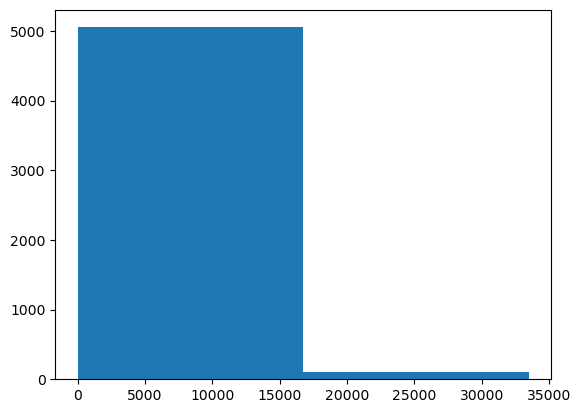

In [43]:
plt.hist(x=df_copy['Crop_Residues'], bins=2)
plt.show()

In [44]:
#variable to hold median crop residues
median_crop_residues = df_copy['Crop_Residues'].median()

# create a condition
condition = (df_copy['Manure_Management'] == 0) & (df_copy['Manure_applied_to_Soils'] == 0)

# Apply the condition to fill missing values in Crop_Residues
df_copy['Crop_Residues'] = df_copy['Crop_Residues'].fillna(value=df_copy.apply(lambda row: 0 if condition[row.name] else median_crop_residues, axis=1))


C:\Users\X464585\AppData\Local\Temp\ipykernel_10572\1041598096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Crop_Residues'] = df_copy['Crop_Residues'].fillna(value=df_copy.apply(lambda row: 0 if condition[row.name] else median_crop_residues, axis=1))


In [63]:
missing_data = df_copy.isnull().sum()
print(missing_data[missing_data > 0])

Forestland    411
dtype: int64


In [67]:
#create a clean variable representing the missing values

df_cleaned = df_copy.copy()

We have now filled all our missing values as well as make changes to values that seemed incorrect, like the negative forestland values. 

Moving onto EDA, where we'll uncover patterns, relationships, and anomalies in our dataset. 

## Export cleaned DataFrame
I'll use a new notebook to do the EDA in - question for Leham and Claudia

## Exploratory Data Analysis (EDA)

#### 1. Understanding the structure of our data

In [54]:
#check first few rows of the dataset
df_cleaned.head()

,Country,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0,0.0,11.712073,54.3617,2388.803,...,352.2947,0.0,0.0,140.6888,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6,0.0,11.712073,53.9874,2388.803,...,367.6784,0.0,0.0,140.6888,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.4,0.0,11.712073,54.6445,2388.803,...,397.5498,0.0,0.0,140.6888,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.0,0.0,11.712073,53.1637,2388.803,...,465.2050,0.0,0.0,140.6888,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.6,0.0,11.712073,52.0390,2388.803,...,511.5927,0.0,0.0,140.6888,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167


In [55]:
# summary stats for numerical columns
df_cleaned.describe()


,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Food_Household_Consumption,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.00000,6270.000000,5859.000000,6270.000000,...,6270.000000,6270.000000,6270.000000,6270.000000,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6.270000e+03,6270.000000
mean,2006.540191,1187.193438,910.020620,822.854395,4196.560705,3531.493280,342.53067,1988.620633,19119.628637,4756.442825,...,1972.100415,1218.098551,655.982660,2579.288498,1.796514e+07,1.753925e+07,1.791469e+07,1.760982e+07,6.560800e+04,0.919996
std,8.071891,5281.832015,3731.785673,3382.929540,17579.907906,15910.794886,1461.89308,5727.522494,82024.222961,26009.968628,...,7489.861190,23258.138915,3256.532767,11160.069763,8.873856e+07,6.799408e+07,7.720637e+07,7.358966e+07,2.360510e+05,0.540741
min,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.004500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.880000e+02,6.550000e+02,-3.918841e+05,-1.415833
25%,2000.000000,0.000000,0.000000,1.170775,180.819000,0.000000,6.00000,30.715825,0.000000,16.186075,...,13.788700,0.000000,0.000000,16.148800,1.075052e+05,2.630065e+05,2.165598e+05,2.162338e+05,5.147145e+03,0.565167
50%,2007.000000,1.657900,0.390700,87.084750,502.618196,0.000000,13.00000,221.476200,145.677400,155.471100,...,182.468950,0.000000,0.000000,140.688800,1.740047e+06,2.453250e+06,2.522517e+06,2.489395e+06,1.207489e+04,0.876375
75%,2014.000000,108.670625,58.627900,270.858200,1463.391166,704.940225,116.00000,1219.779025,3409.380800,1296.139125,...,897.065425,0.000000,6.884600,883.992325,8.437579e+06,8.536314e+06,9.138134e+06,9.206787e+06,3.616107e+04,1.237750
max,2020.000000,114616.401100,52227.630600,33490.074100,158064.797800,241025.069600,16459.00000,67945.765000,797183.079000,466288.200700,...,70592.646500,991717.543100,51771.256800,139388.923600,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


#### Notes


In [61]:
#check for unique or categorical columns
df_cleaned.nunique()

Country                             229
Year                                 28
Savanna_fires                      3742
Forest_fires                       2956
Crop_Residues                      4893
Rice_Cultivation                   3311
Drained_organic_soils_(CO2)        2099
Pesticides_Manufacturing           1234
Food_Transport                     5951
Forestland                          600
Food_Household_Consumption         5769
Food_Retail                        5862
On-farm_Electricity_Use            4863
Food_Packaging                     3430
Agrifood_Systems_Waste_Disposal    5828
Food_Processing                    3303
Fertilizers_Manufacturing          2716
IPPU                               5462
Manure_applied_to_Soils            5396
Manure_left_on_Pasture             5393
Manure_Management                  5403
Fires_in_organic_soils              126
Fires_in_humid_tropical_forests    1736
On-farm_energy_use                 5094
Rural_population                   5971


In [68]:
#check dtypes and null values again - on the cleaned version of the dataset.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6270 entries, 3 to 6964
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          6270 non-null   object 
 1   Year                             6270 non-null   int64  
 2   Savanna_fires                    6270 non-null   float64
 3   Forest_fires                     6270 non-null   float64
 4   Crop_Residues                    6270 non-null   float64
 5   Rice_Cultivation                 6270 non-null   float64
 6   Drained_organic_soils_(CO2)      6270 non-null   float64
 7   Pesticides_Manufacturing         6270 non-null   float64
 8   Food_Transport                   6270 non-null   float64
 9   Forestland                       6270 non-null   float64
 10  Food_Household_Consumption       6270 non-null   float64
 11  Food_Retail                      6270 non-null   float64
 12  On-farm_Electricity_Use  

#### 2. Univariate Analysis

Here we try to understand distributions, central tendencies and spread of individual features. 

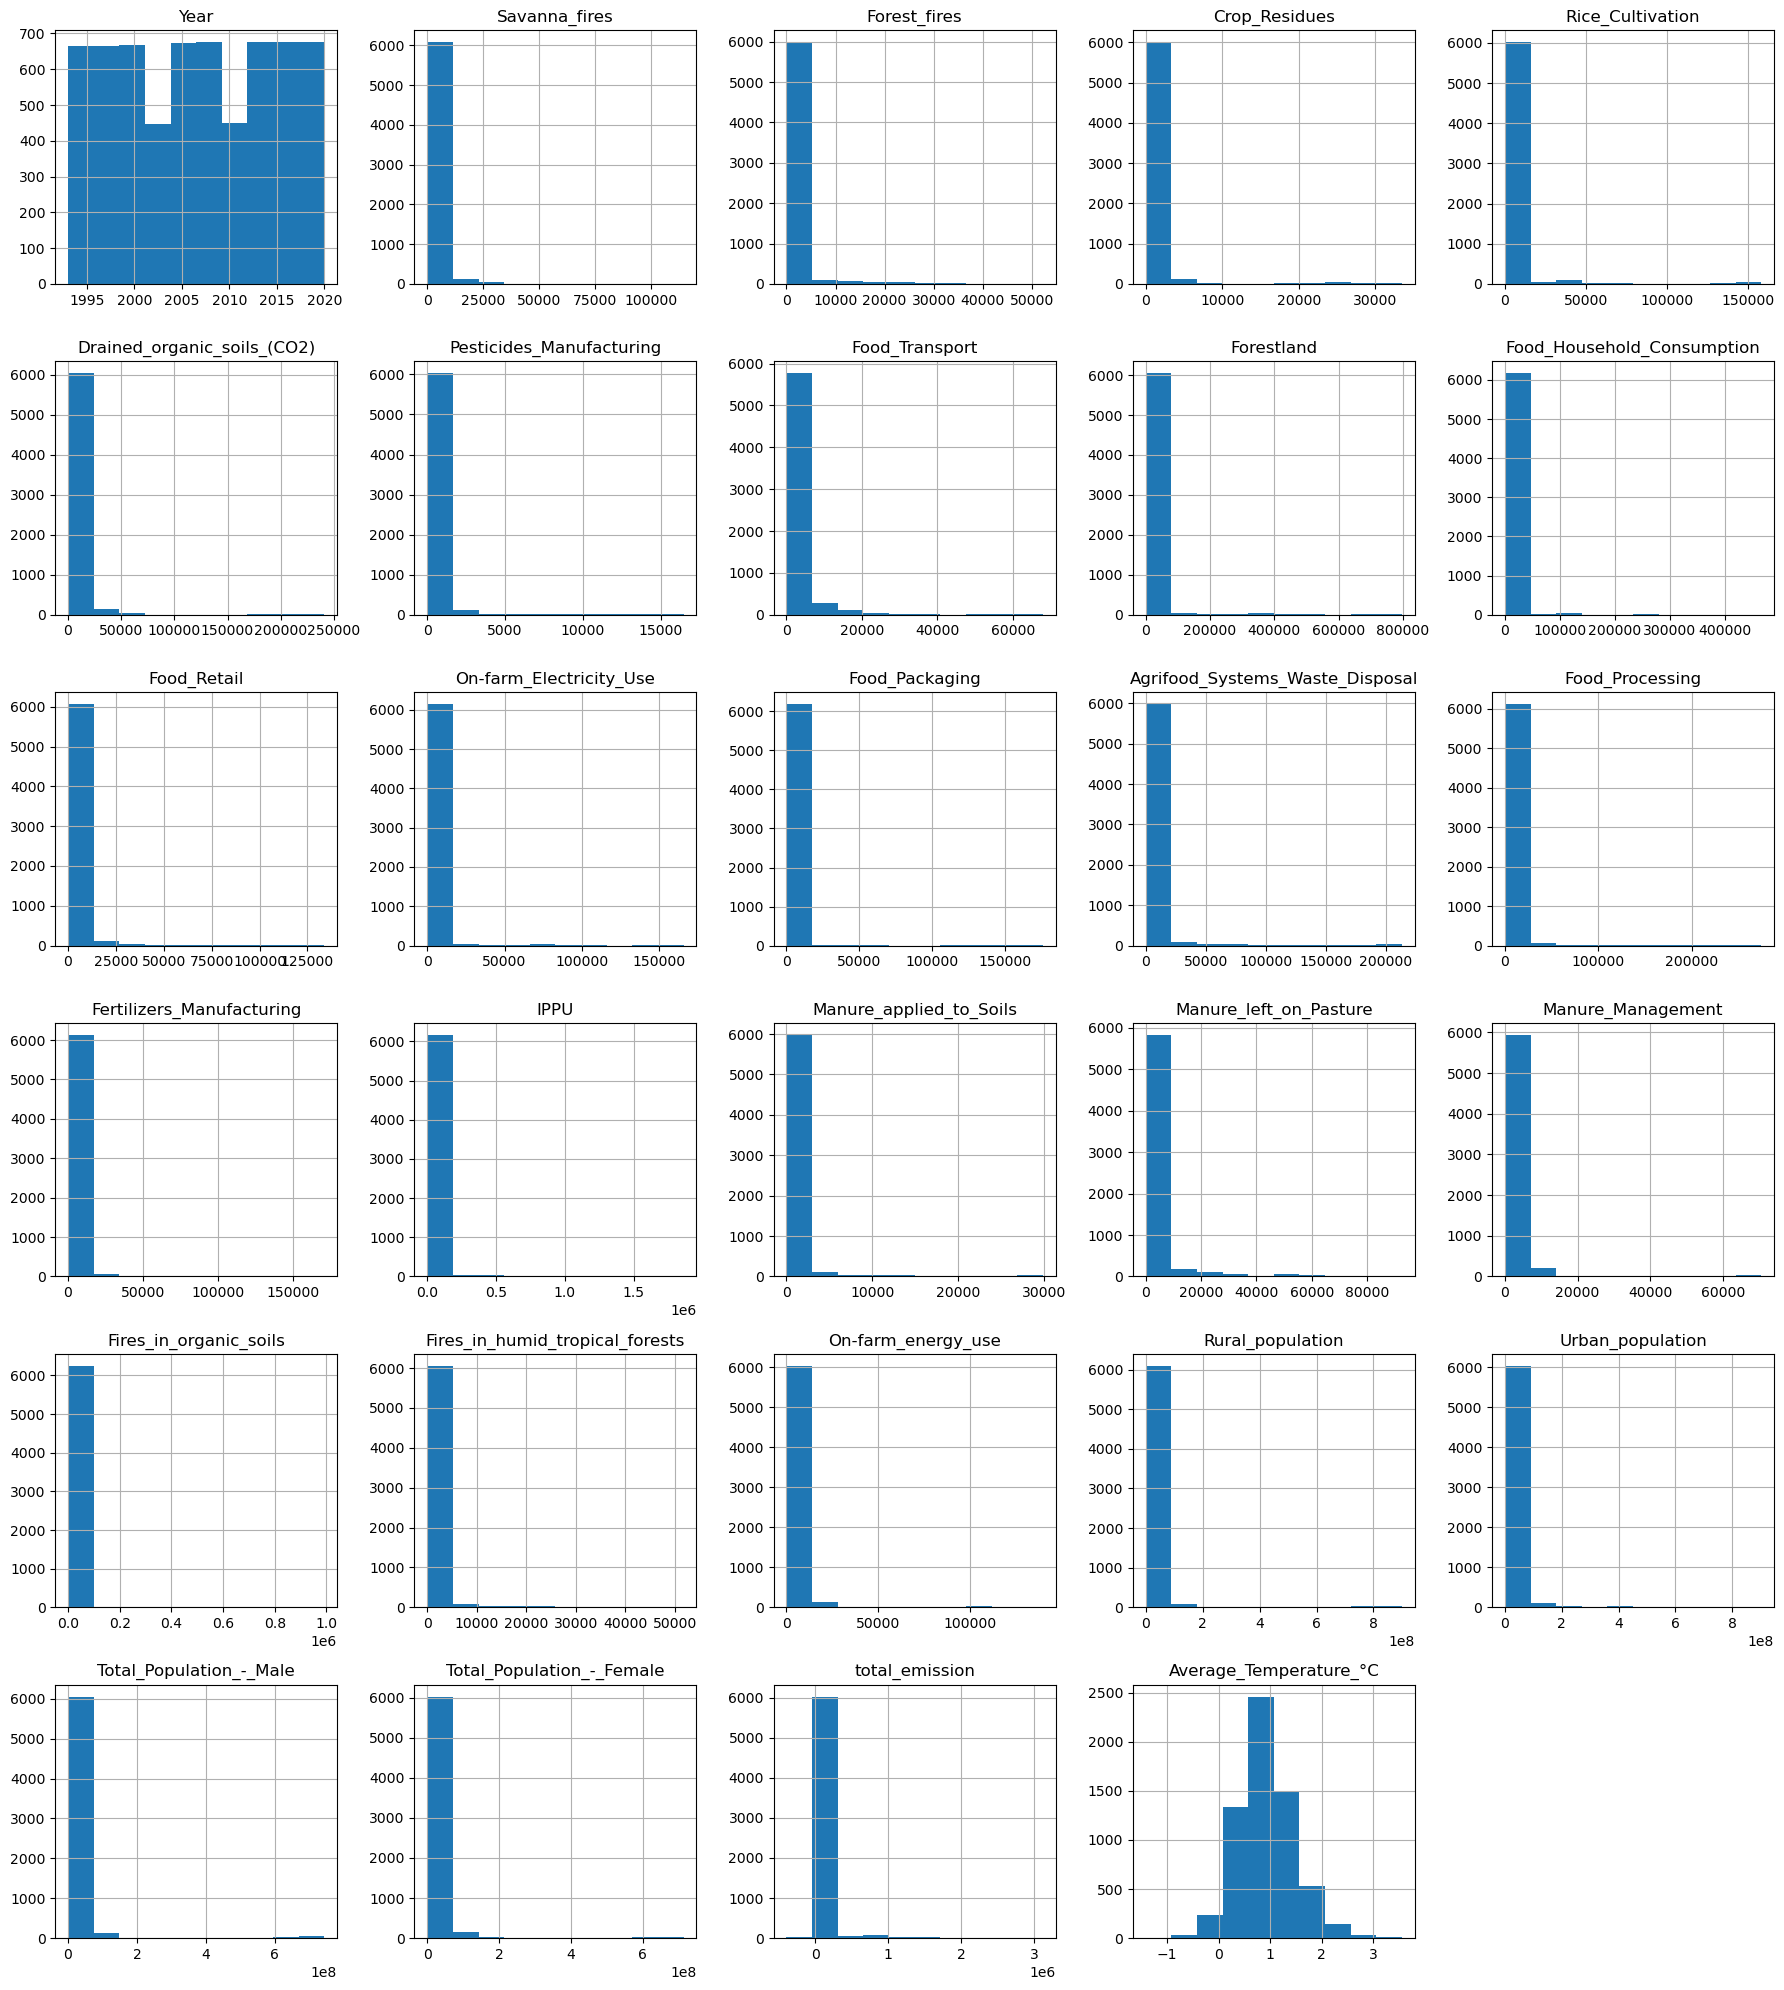

In [75]:
# Histograms for numerical columns
df_cleaned.hist(figsize=(18, 20))
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

#### Notes
1. Skewed distributions:
    - Most of our features are right-skewed, suggesting that most values are low, while a small number of instances have much higher values. 
    - This could indicate that majority of countries in our dataset contribute relatively low emissions, while a small number of countries contiribute larger amounts. For example:
    - Food Processing: A few countries might have large industrial-scale food processing, while others have little to no activity.
    - On-farm Electricity Use: Some countries might use significantly more electricity for farming, possibly due to mechanization or industrial agriculture practices.


2. Temperature Data:
    - The Average_Temperature_°C feature shows a roughly normal distribution, suggesting that temperature values are fairly well-distributed and centered around an average (e.g., between -1°C and 3°C in this case).
    - This might indicate that countries in the dataset are experiencing temps around the global average. 
    - Temp data could be used to analyse the correlation between emissions and avg temp. 


3. Total Population:
    - Skewed to the right with a few outliers, suggesting that there are some countires with much larger populations than most. 
    - The population features could play an important role as it's likely a key factor in explaing emissions. 


4. Emissions:
    - The total_emission feature is highly right-skewed, which is common for emission data. A few countries or sectors are likely contributing disproportionately to global emissions.
    - This is expected as larger countries tend to emit far more greenhouse gases than smaller countries. 


5. Rare Events:
    - Features like Fires_in_organic_soils and Fires_in_humid_tropical_forests show very low values for most observations. This indicates that such events are relatively rare but could have large impacts when they do occur.
    - We might treat these features differently. 

#### 3. Bivariate Analysis

Here we'll analyse the relationship between two variables - specifically between independent variables and the dependent variables. 

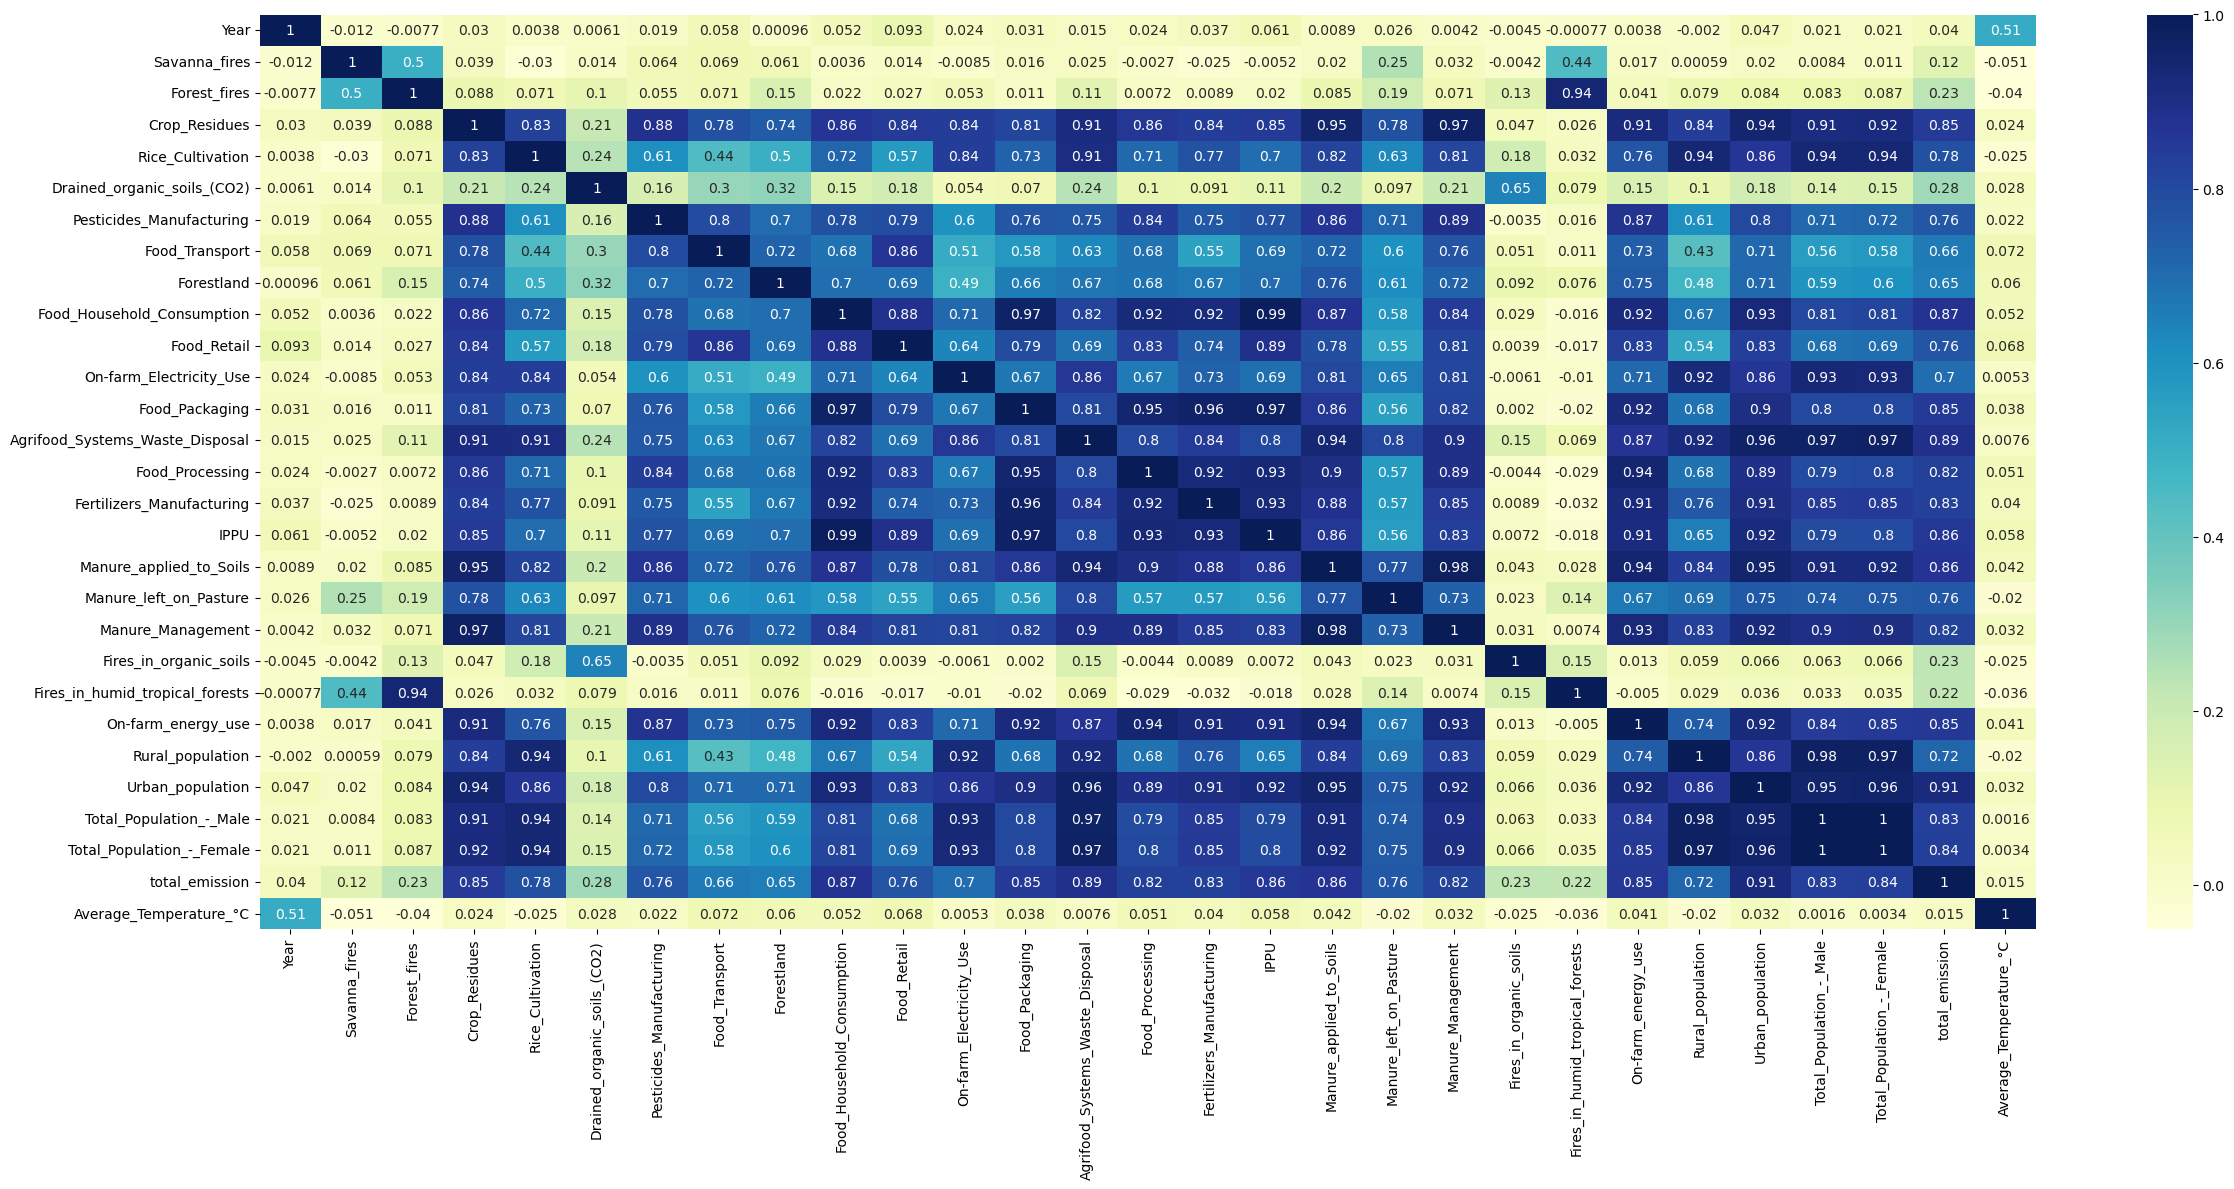

In [101]:
#corr matrix to view relationships in varibales
df_numeric = df_cleaned.drop(['Country'], axis = 1)

plt.figure(figsize=(25, 12))
sns.heatmap(df_numeric.corr(), annot = True, cmap = 'YlGnBu')
plt.tight_layout()
plt.show()


#### Notes:
1. Most of our numerical features have a strong correlation with the populations and total emissions features. I'm referring to populations here, but it takes into account all of the population features (Rural, Urban, Male, Female).

2. Urban population seems to hae a very strong correlation with total_emissions. This makes sense so far as we would expect that countries with higher populations increase contribute more towards total emissions. We could potentially identify the countries that contribute more towards total emissions. 

3. Total emissions with a number agricultural activities. We'll look at the relationships between the agri-activities and total emissions in the next section. 

4. We notice some relationship between various agri-activities, for example, there's a strong relationship betweem Food Household consumption and Food packaging. This makes sense because as the  food household consumtion variable increases, the demand for more food increase, which then increases the supply of food packaging. We can also state that the positive relationship comes from the fact that households dispose of more food packaging, often not in the most sustainable ways.

5. We see some relationship between the avg temperature and the year, with global avg temp descreasing as the years increase. 

In [222]:
country_avg_temp_change = df_cleaned.groupby('Country')['Average_Temperature_°C'].mean()
country_avg_temp_change.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam',
       'Wallis and Futuna Islands', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=229)

Here we can see avg change in temp by country

In [233]:
#countries where avg temp change is greater 1 degree
countries_with_significant_temp_change = country_avg_temp_change[country_avg_temp_change > 1]

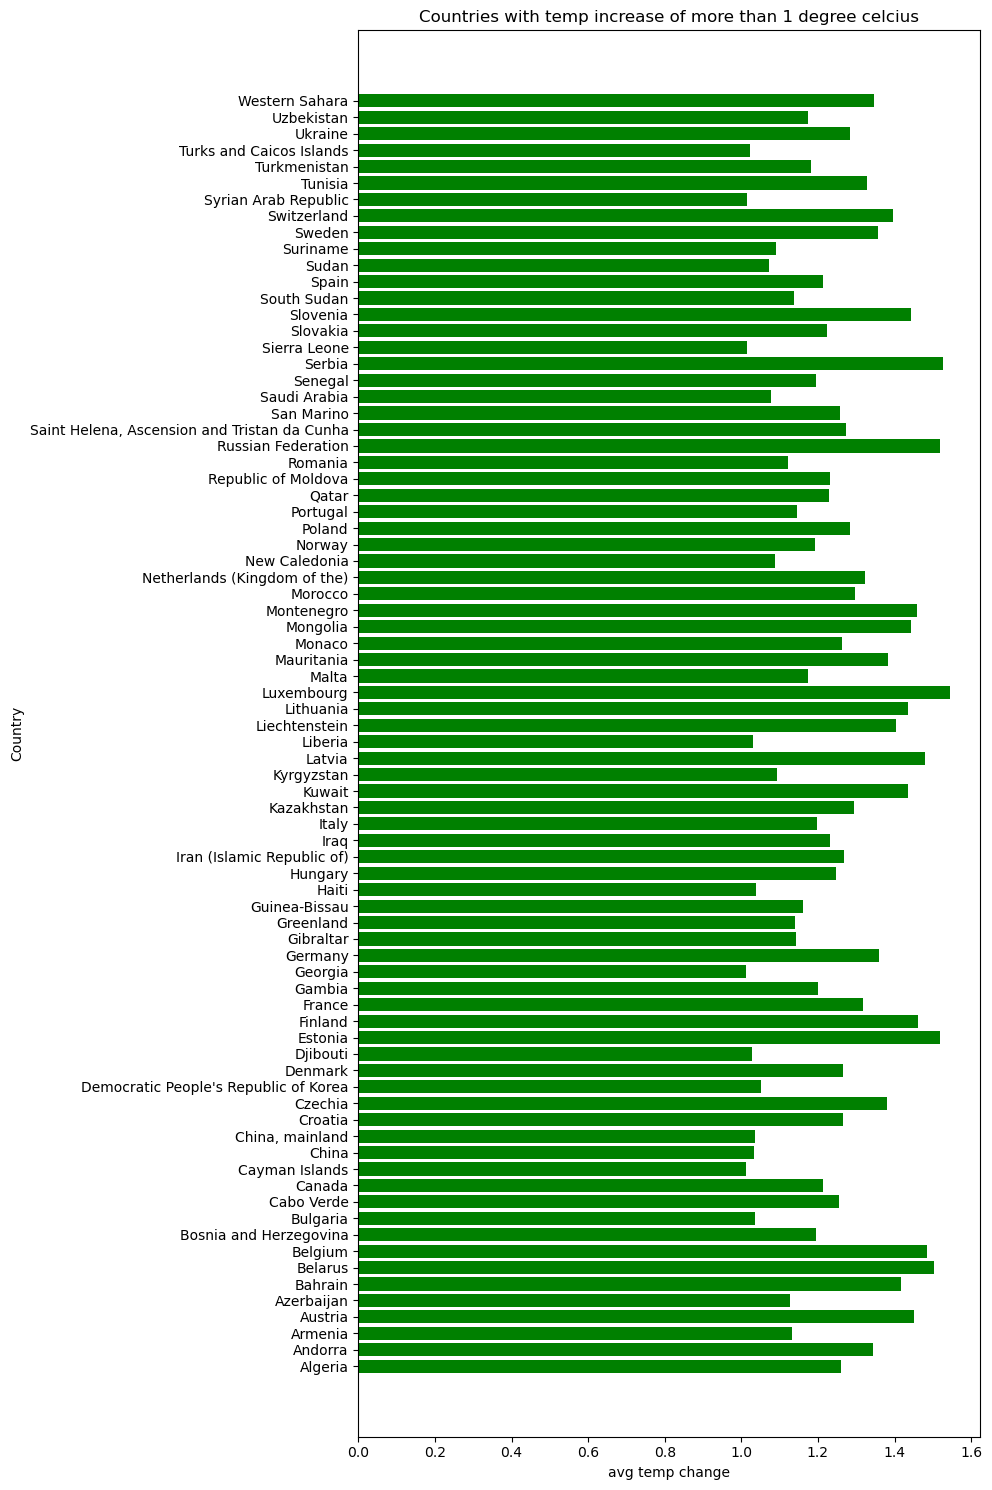

In [242]:
plt.figure(figsize = (10,15))
plt.barh(countries_with_significant_temp_change.index, countries_with_significant_temp_change.values, color = 'green')
plt.ylabel("Country")
plt.xlabel("avg temp change")
plt.title("Countries with temp increase of more than 1 degree celcius")
plt.tight_layout()
plt.show()

#### Notes
Most of these countries are above the equator. Are countires North of the equator prone to contributing more towards total emissions which in turn causes changes in temperatures over time? Let's look at the inverse - countries with less than 1 degree change in temp.

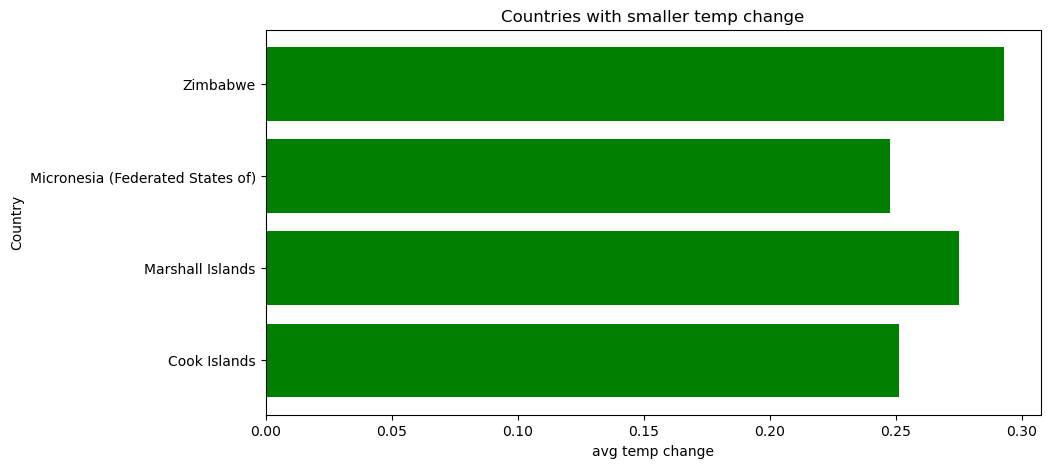

In [297]:
countries_small_temp_change = country_avg_temp_change[country_avg_temp_change < 0.3]

plt.figure(figsize = (10,5))
plt.barh(countries_small_temp_change.index, countries_small_temp_change.values, color = 'green')
plt.ylabel("Country")
plt.xlabel("avg temp change")
plt.title("Countries with smaller temp change")
plt.show()

#### Notes
High level view:
It seems as if most countries are in Africa and South America based of the bar graph above. 

Let's look at the avg temp change across the years for each country

In [249]:
years_avg_temp_change = df_cleaned.groupby('Year')['Average_Temperature_°C'].mean()

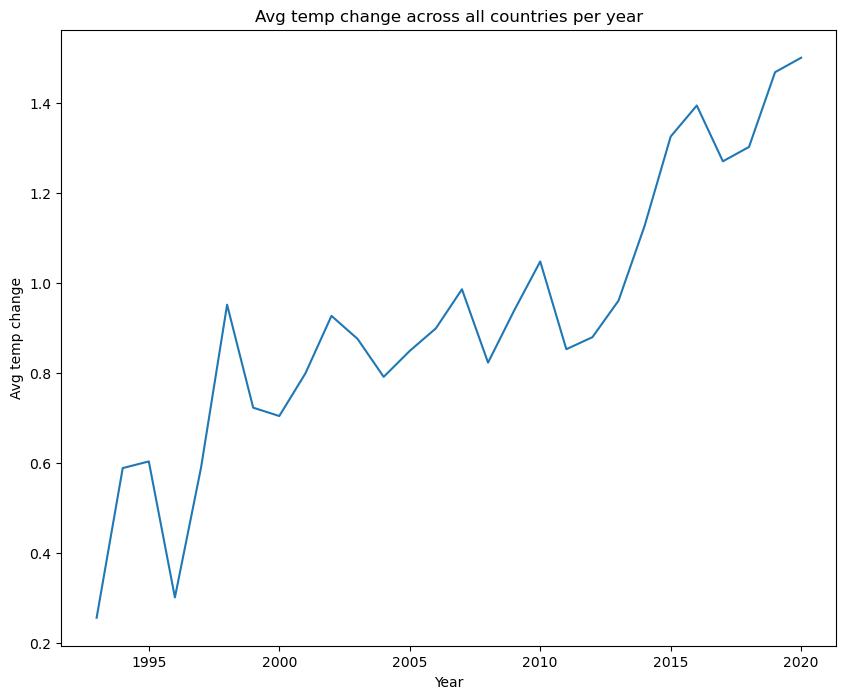

In [259]:
#plot line graph
plt.figure(figsize = (10, 8))
plt.plot(years_avg_temp_change.index, years_avg_temp_change.values)
plt.xlabel("Year")
plt.ylabel("Avg temp change")
plt.title("Avg temp change across all countries per year")
plt.show()

#### Notes
1. Avg temps have increased over the years. 

2. We see declines in the avg temp change over years, this could relate to:

    2.1  Natural Climate Variability
El Niño and La Niña: These phenomena are part of the El Niño-Southern Oscillation (ENSO) cycle. El Niño events typically lead to warmer global temperatures, while La Niña events can cause temporary cooling. The interplay between these can create short-term dips in temperature trends.
Pacific Decadal Oscillation (PDO): This longer-term climate pattern can also influence temperature trends, causing periods of warming and cooling over decades.

    2.2 Volcanic Activity
Volcanic eruptions can inject large amounts of ash and sulfur dioxide into the atmosphere, which can temporarily cool the Earth’s surface by reflecting sunlight away. This can lead to noticeable dips in temperature for a few years following significant eruptions.

    2.3 Solar Activity
Variations in solar output can affect global temperatures. Periods of lower solar activity, such as during a solar minimum, can contribute to temporary cooling.

    2.4 Ocean Heat Distribution
Changes in ocean currents and heat distribution can also play a role. For instance, excess heat may be absorbed by deeper ocean layers, leading to temporary cooling at the surface.

    2.5 Data Variability and Measurement Changes
Changes in how temperature data is collected and processed can also introduce variability. For example, urbanization can affect local temperature readings, and adjustments in data collection methods over time can lead to apparent dips or spikes.

Overall finding:
THE PLANET IS GETTING WARMER 

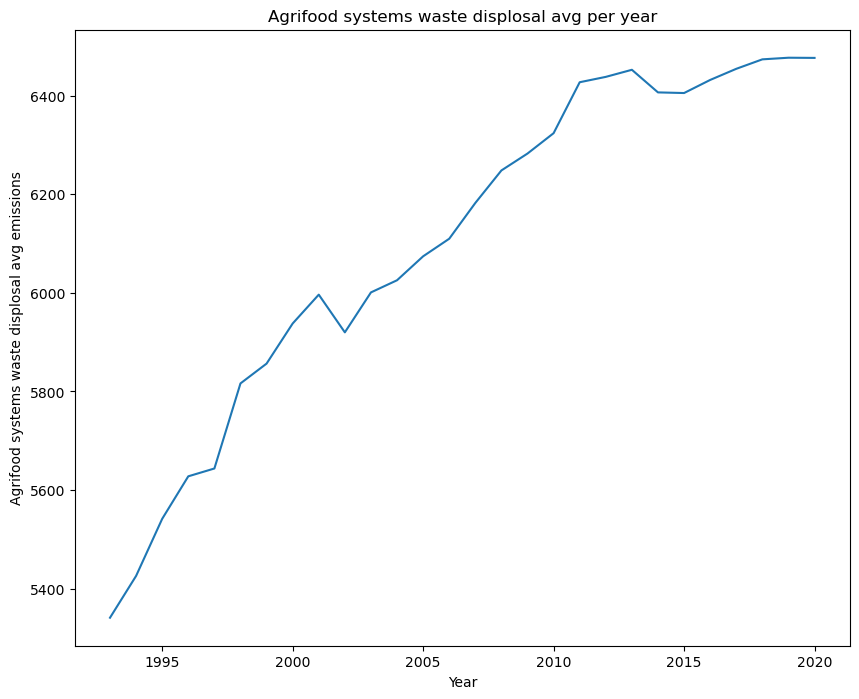

In [263]:
years_waste_disposal_avg = df_cleaned.groupby('Year')['Agrifood_Systems_Waste_Disposal'].mean()
#plot line graph
plt.figure(figsize = (10, 8))
plt.plot(years_waste_disposal_avg.index, years_waste_disposal_avg.values)
plt.xlabel("Year")
plt.ylabel("Agrifood systems waste displosal avg emissions")
plt.title("Agrifood systems waste displosal avg per year")
plt.show()

#### Notes
Agrifood_Systems_Waste_Disposal is one of the biggest contributors to total emissions. This led me to look into how the avg emissions for this activity increased over the years. We can see that is has increased by a large amount. Let's look at the top countires contributing to this activity. 

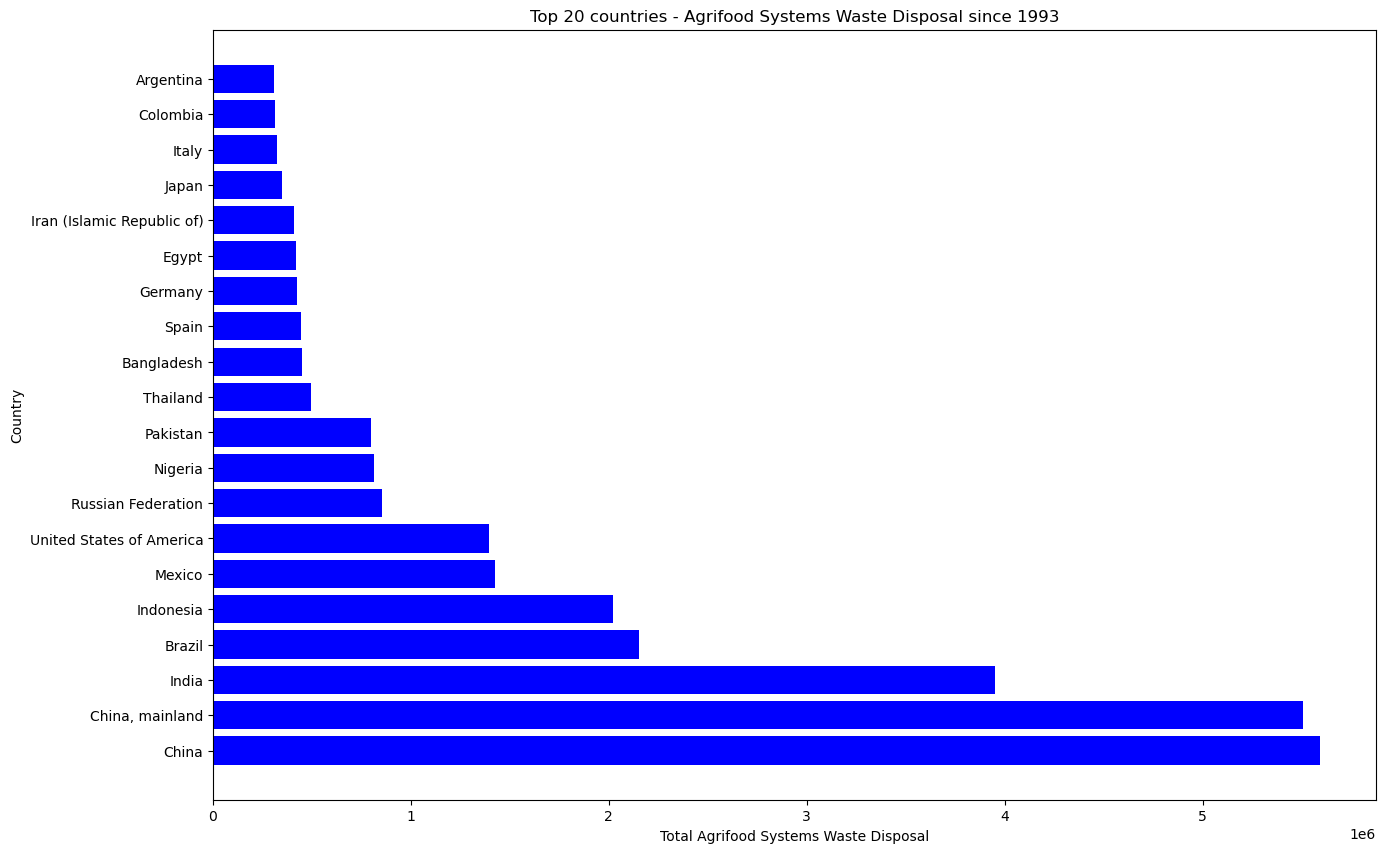

In [288]:
#group countries by total Agrifood_Systems_Waste_Disposal
country_waste_disposal_total= df_cleaned.groupby('Country')['Agrifood_Systems_Waste_Disposal'].sum().to_frame()

#find top 20 counries contributing the most to this activity.
top10_highest_total_waste_disposal = country_waste_disposal_total.nlargest(20, "Agrifood_Systems_Waste_Disposal")

#plot horizontal bargraph
plt.figure(figsize = (15,10))
plt.barh(top10_highest_total_waste_disposal.index, top10_highest_total_waste_disposal['Agrifood_Systems_Waste_Disposal'], color = 'blue')
plt.ylabel("Country")
plt.xlabel("Total Agrifood Systems Waste Disposal")
plt.title("Top 20 countries - Agrifood Systems Waste Disposal since 1993")
plt.show()


#### Notes
1. In China and Mainland China, the total amount of emissions from this activity is more than 5 Million killotonnes, or more than 5 Billion kilograms. We understand this as an enormous amount of CO2 being released. 

2. India is following closely at around 4 billion kilograms of emissions. 

3. Most countires seem to be situated in the East which could reflect the population size of these countries and the scale of agricultural and food production activities in these regions.

4. The fact that these countries are leading could indicate systemic practices within the agri-food sector that contribute disproportionately to emissions, such as large-scale farming, food waste, and less efficient waste management processes.

5. This finding could help stakeholders focus on targeted strategies for emission reduction in high-impact countries. 

6. Given that emissions in countries like China and India are much higher than in other countries, these could be considered outliers in your dataset. Decide whether to include, scale, or adjust for these high emissions values in your model.

#### Relationship between population types - rural and urban, and the total emissions. 

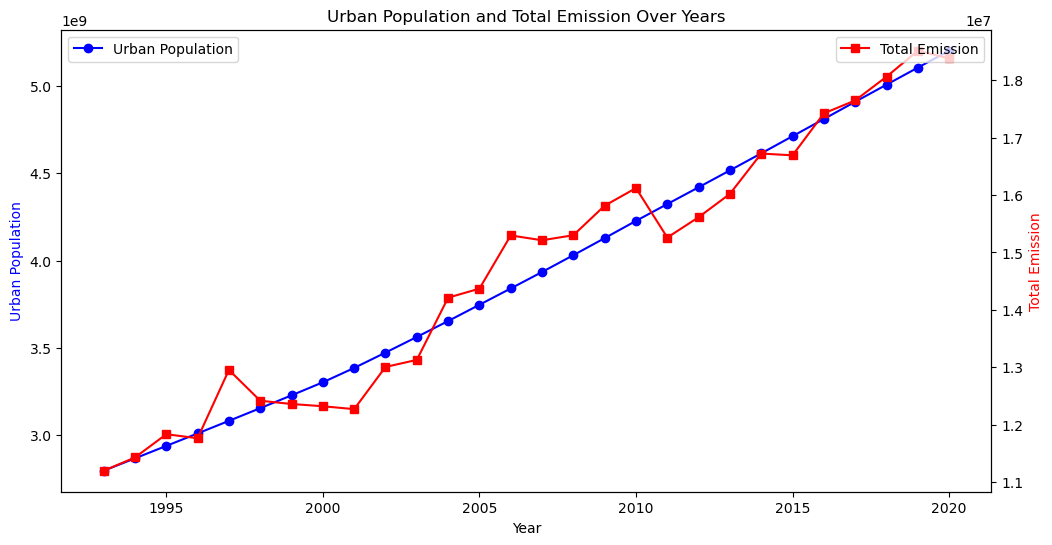

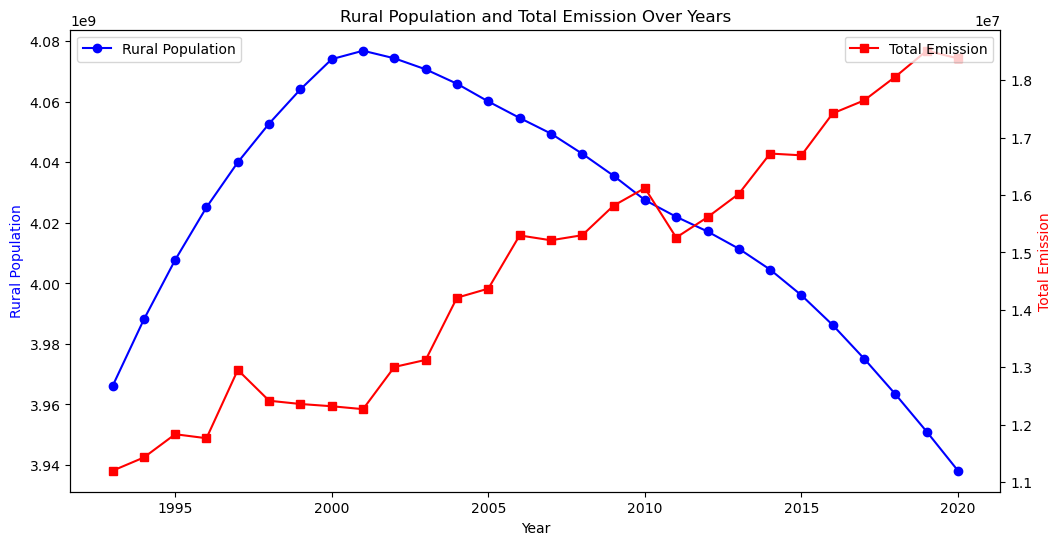

In [320]:
import matplotlib.pyplot as plt

# Create total urban population variable grouped by year
total_urban_population_year = df_cleaned.groupby('Year')['Urban_population'].sum().to_frame()

# Create total rural population variable grouped by year
total_rural_population_year = df_cleaned.groupby('Year')['Rural_population'].sum().to_frame()

# Create total emission variable grouped by year
total_emission_yearly = df_cleaned.groupby('Year')['total_emission'].sum().to_frame()

# Plot a line graph tracking the relationship between urban population and total emissions
plt.figure(figsize=(12, 6))

# Plotting Urban Population
plt.plot(total_urban_population_year.index, total_urban_population_year['Urban_population'], 
         label='Urban Population', color='blue', marker='o')

# Creating a twin y-axis to plot Total Emission
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(total_emission_yearly.index, total_emission_yearly['total_emission'], 
         label='Total Emission', color='red', marker='s')

# Adding titles, labels, and legend
plt.title("Urban Population and Total Emission Over Years")
ax1.set_xlabel("Year")
ax1.set_ylabel("Urban Population", color='blue')
ax2.set_ylabel("Total Emission", color='red')

# Displaying the legend to distinguish between the lines
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot a line graph tracking the relationship between rural population and total emissions
plt.figure(figsize=(12, 6))

# Plotting Rural Population
plt.plot(total_rural_population_year.index, total_rural_population_year['Rural_population'], 
         label='Rural Population', color='blue', marker='o')

# Creating a twin y-axis to plot Total Emission
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(total_emission_yearly.index, total_emission_yearly['total_emission'], 
         label='Total Emission', color='red', marker='s')

# Adding titles, labels, and legend
plt.title("Rural Population and Total Emission Over Years")
ax1.set_xlabel("Year")
ax1.set_ylabel("Rural Population", color='blue')
ax2.set_ylabel("Total Emission", color='red')

# Displaying the legend to distinguish between the lines
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plots
plt.show()


#### Notes
1. As urban population increases, so does the total emissions - this tells us that most emissions are produced by those in urban settings. 

2. The rural population saw a decline around the year 2000, this could be because of things like urbanisation - a process through which people move from rural area to urban areas. 
    - People moving to urban area could increase the population, which then increases demand for food, which then starts the production process, and increases agricultural activities which then increases emissions. 